In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("classic")

In [27]:
def read_sample(file_name):
    data = []
    f = open(file_name, 'r')
    data = f.read().replace('\t', ' ').replace(',', '.').replace('\n', '').split(' ')
    f.close()
    return np.array(data).astype(np.float)

In [28]:
sample_a = read_sample('K_v21_a.txt')
sample_b = read_sample('K_v21_b.txt')
sample_c = read_sample('K_v21_c.txt')

In [29]:
def ecdf_ext(sample):
    """
    
    Function to build emperical distribution function.
    Additional points in order to make it stair-like.
    
    """
    
    # Return unique sorted points and their counts
    x, counts = np.unique(sample, return_counts=True)
    
    # Cummulative sum of points devided by sample size
    Fx = np.cumsum(counts).astype(np.double) / sample.size
    
    # Extended lists with additional points to make the function sharper
    x_ext = []
    Fx_ext = []
    
    x_ext.append(x[0])
    Fx_ext.append(0)
    
    for i in range(np.size(x) - 1):
        for num in np.linspace(x[i], x[i + 1], 100):
            x_ext.append(num)
        for _ in range(100):
            Fx_ext.append(Fx[i])
            
    x_ext.append(x[-1])
    Fx_ext.append(Fx[-1])
    
    return x_ext, Fx_ext

In [30]:
def plot_ecdf(sample):
    """
    
    Plot both emperical and theoretical cummulative distribution functions.
    
    """
    
    # loc – sample mean
    # scale – sample standard deviation
    normal_dist = stats.norm(loc=np.mean(sample), scale=np.std(sample))
    
    x_emp, Fx_emp = ecdf_ext(sample)
    
    #x_th = np.linspace(x_emp[0], x_emp[-1], 1000)
    x_th = x_emp
    Fx_th = normal_dist.cdf(x_th)
    
    plt.figure(figsize=(12, 8))
    plt.title('Cummulative Distribution Function')
    plt.plot(x_th, Fx_th, '-k', lw=2, label='Theoretical CDF')
    plt.plot(x_emp, Fx_emp, '-r', lw=2, label='Empirical CDF')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend(fancybox=True, loc='right')
    plt.show()

NameError: name 'fx_emp' is not defined

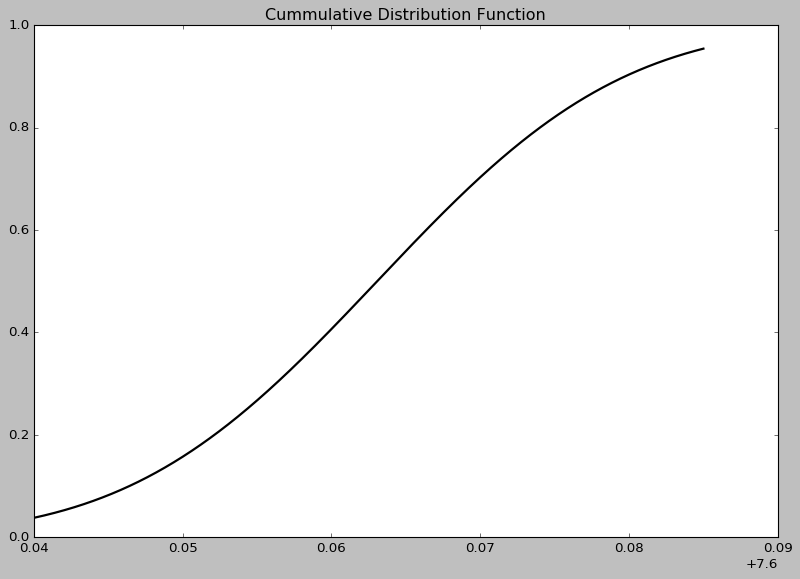

In [31]:
plot_ecdf(sample_a)

In [ ]:
plot_ecdf(sample_b)

In [ ]:
plot_ecdf(sample_c)

# Алгоритм для критерия Колмогорова

Учебник Энатской, с . 285

Проверка выборки на нормальность по критерию Колмогорава:
1. Вычислить куммулятивную эмперическую функцию распределения;
2. Вычислить максимальное отклонение теоретической функции распределения от эмперической D;
3. Вычислить L = D$\sqrt{n}$;
4. Для заданного уровня значимости $\alpha = 0.05$ по таблице распределения Колмогорова

   найти $L_\alpha$ ($L_\alpha = 1.358$);
5. Если $L < L_\alpha$, то выборка удовлетворяет условию нормальности.

In [ ]:
def ecdf(sample):
    """
    
    Ecdf which is to be used in the Kolmogorov criteria.
    No additional points.
    
    """
    
    # Return unique sorted points and their counts
    quantities, counts = np.unique(sample, return_counts=True)
    
    # Cummulative sum of points devided by sample size
    cumprob = np.cumsum(counts).astype(np.double) / sample.size
    
    return quantities, cumprob

In [ ]:
def kolmogorov_criteria(sample):
    L_alpha = 1.358
    
    x, fx_emp = ecdf(sample)
    normal_dist = stats.norm(loc=np.mean(sample), scale=np.std(sample))
    fx_th = normal_dist.cdf(x)
        
    D = np.max(np.abs(fx_emp - fx_th))
    L = D * np.sqrt(sample.size)
    
    return L < L_alpha
    

In [ ]:
kolmogorov_criteria(sample_a)

In [ ]:
kolmogorov_criteria(sample_b)

In [ ]:
kolmogorov_criteria(sample_c)